## Data Science - Prediction/Modeling Based on Energy Usage and the Weather.

The goal of this assignment is to develop a method to predict the electricity usage based on the weather conditions. Provided are two datasets for this task:

* Weather: (weather_data.csv) Weather data for one year with daily conditions.
* Energy Usage: (energy_data.csv) Energy usage history for one year (in kW) with 30-minute intervals. The energy usage of specific devices like AC, Fridge, washer, etc. are also given.

## Task 01

#### Examine the data, parse the time fields wherever necessary. Take the sum of the energy usage (use [kW]) to get per day usage and merge it with weather data.

In [1]:
# importing important libraries for data analysis and parsing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
import datetime
from sklearn.metrics import mean_squared_error, f1_score
import math

In [2]:
# Reading the two csv files into variables that can be dealt with.

weather_dataset = pd.read_csv('weather_data.csv')
energy_dataset = pd.read_csv('energy_data.csv')

In [3]:
# Printing out the head of the weather dataset to see what values there are.
# Also, printing out the shape of the weather dataframe to see how many entries there are.
# As we can see, there are 13 columns with values such as temperature. humidity, and visibility.
# The time is in Unix format, for example, 1388534400.

print("The shape of the weather data is:", weather_dataset.shape)
weather_dataset.head()

The shape of the weather data is: (8760, 13)


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [4]:
# Printing out the column values of the weather dataframe to see what they are and decide
# how to use the features to create our model(s) later on.

print("These are the column values of the weather dataset:\n",weather_dataset.columns.values)

# Printing out the number of missing values there are in the weather dataset.

missing_weather = weather_dataset.isna().sum()
print("\nThe number of missing values in each column could be seen below.\n")
print(missing_weather)

# We can notice that there are 1470 empty values within the 'cloudCover' column, which is out
# of the total 8760 possible rows. We may need to impute values either via mean, random values,
# or via linear regression.

These are the column values of the weather dataset:
 ['temperature' 'icon' 'humidity' 'visibility' 'summary' 'pressure'
 'windSpeed' 'cloudCover' 'time' 'windBearing' 'precipIntensity'
 'dewPoint' 'precipProbability']

The number of missing values in each column could be seen below.

temperature             0
icon                    0
humidity                0
visibility              0
summary                 0
pressure                0
windSpeed               0
cloudCover           1470
time                    0
windBearing             0
precipIntensity         0
dewPoint                0
precipProbability       0
dtype: int64


In [5]:
# Since there are 1470 missing entries of the 'cloudCover' field, I decided that instead of
# removing those respective rows from the dataset, I would instead be imputing values into
# the missing slots. I would aim to keep the mean the same which would ease in computing 
# these new values to fill in the gaps.

cloudcover_grouped = weather_dataset.groupby('summary')
cloudcover_filled = cloudcover_grouped.apply(lambda x: x.fillna(x['cloudCover'].mean()))

# Printing the first 50 rows to see if there are any missing values left in the column of 
# 'cloudCover' and to make sure that the new values (the mean) are reasonable given the 
# value associated with it in the 'summary' column.

cloudcover_filled.head(50)

# the new values seem reasonable, this also ensures no missing values in our dataset.

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.290000,1388534400,279,0.0000,23.89,0.00
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.060000,1388538000,195,0.0000,5.87,0.00
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.030000,1388541600,222,0.0000,6.17,0.00
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.140000,1388545200,209,0.0000,5.63,0.00
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.040000,1388548800,217,0.0000,5.87,0.00
5,20.31,clear-night,0.47,10.00,Clear,1023.25,12.65,0.000000,1388552400,283,0.0000,3.30,0.00
6,19.22,clear-night,0.48,10.00,Clear,1023.21,9.99,0.000000,1388556000,283,0.0000,2.69,0.00
7,18.10,clear-night,0.52,10.00,Clear,1024.25,7.76,0.000000,1388559600,255,0.0000,3.42,0.00
8,17.47,clear-night,0.55,10.00,Clear,1025.02,7.73,0.000000,1388563200,245,0.0000,4.00,0.00
9,15.63,clear-night,0.61,10.00,Clear,1025.16,5.76,0.000000,1388566800,220,0.0000,4.45,0.00


In [6]:
# printing out the number of missing values to make sure.

missing_weather = weather_dataset.isna().sum()
print("\nThe number of missing values in each column could be seen below.\n")
print(missing_weather)

# Will need to replace the current 'cloudCover' column from the weather dataframe with the new 
# 'cloudCover' column. 

weather_dataset['cloudCover'] = cloudcover_filled['cloudCover']

# printing the top 50 rows to see if this new change is applied.

weather_dataset.head(50)


The number of missing values in each column could be seen below.

temperature             0
icon                    0
humidity                0
visibility              0
summary                 0
pressure                0
windSpeed               0
cloudCover           1470
time                    0
windBearing             0
precipIntensity         0
dewPoint                0
precipProbability       0
dtype: int64


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.290000,1388534400,279,0.0000,23.89,0.00
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.060000,1388538000,195,0.0000,5.87,0.00
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.030000,1388541600,222,0.0000,6.17,0.00
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.140000,1388545200,209,0.0000,5.63,0.00
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.040000,1388548800,217,0.0000,5.87,0.00
5,20.31,clear-night,0.47,10.00,Clear,1023.25,12.65,0.000000,1388552400,283,0.0000,3.30,0.00
6,19.22,clear-night,0.48,10.00,Clear,1023.21,9.99,0.000000,1388556000,283,0.0000,2.69,0.00
7,18.10,clear-night,0.52,10.00,Clear,1024.25,7.76,0.000000,1388559600,255,0.0000,3.42,0.00
8,17.47,clear-night,0.55,10.00,Clear,1025.02,7.73,0.000000,1388563200,245,0.0000,4.00,0.00
9,15.63,clear-night,0.61,10.00,Clear,1025.16,5.76,0.000000,1388566800,220,0.0000,4.45,0.00


In [7]:
# Apparently there are three entries missing still in the column 'cloudCover'

null_rows = weather_dataset[weather_dataset['cloudCover'].isnull()]

# It seems that there are no other occurences of 'Rain and Breezy' and 'Light Rain and Breezy'
# within the dataset in the 'summary' column that has an existing / real number located in the
# 'cloudCover' column. 

# Printing the 3 rows to see what values there are and make a reasonable estimate to fill in the
# missing slots. 

print(null_rows)

      temperature  icon  humidity  visibility                summary  \
2513        61.90  rain      0.91        2.59        Rain and Breezy   
7081        48.37  rain      0.88        6.96  Light Rain and Breezy   
7082        48.50  rain      0.87        6.84  Light Rain and Breezy   

      pressure  windSpeed  cloudCover        time  windBearing  \
2513   1002.35      21.46         NaN  1397581200          186   
7081   1011.45      18.04         NaN  1414026000           18   
7082   1010.79      18.98         NaN  1414029600           18   

      precipIntensity  dewPoint  precipProbability  
2513           0.0876     59.12               0.76  
7081           0.0513     44.86               0.71  
7082           0.0259     44.80               0.63  


In [8]:
# Finding what value to give the empty value at entry 2513, the 'Rain and Breezy' entry.

mean_rain_breezy = weather_dataset.loc[(weather_dataset['summary']=='Breezy') | (weather_dataset['summary']=='Rain'), 'cloudCover'].mean()

print("The value to assign at the empty slot for rain and breezy is:",mean_rain_breezy)

# Based off of this, looking at 'cloudCover' the estimated value would be 0.434747. 
# This seems reasonable as it is the average between the 'Rain' and 'Breezy' values.
# Also, breezy tends to have lower cloudCover value.

weather_dataset.loc[weather_dataset['summary'] == 'Rain and Breezy', 'cloudCover'] = mean_rain_breezy

The value to assign at the empty slot for rain and breezy is: 0.4347472455139823


In [9]:
# Finding what value to give the empty values at entries 7081 and 7082, which have a 'summary'
# value of 'Light Rain and Breezy'. 

mean_light_r_breezy = weather_dataset.loc[(weather_dataset['summary']=='Light Rain') | (weather_dataset['summary']=='Breezy'), 'cloudCover'].mean()

print("The value to assign at the empty slots for light rain and breezy is:", mean_light_r_breezy)

# Based off of this, the estimated value would be 0.411369.
# This seems like a reasonable value as light rain tends to have a lower cloudCover value.

weather_dataset.loc[weather_dataset['summary'] == 'Light Rain and Breezy', 'cloudCover'] = mean_light_r_breezy

The value to assign at the empty slots for light rain and breezy is: 0.4113695486192326


In [10]:
# Let's see if there are still any null values left in the weather dataframe.

missing_weather = weather_dataset.isna().sum()
print("\nThe number of missing values in each column could be seen below.\n")
print(missing_weather)

# Perfect, there seems to be no more missing values in the weather dataframe.


The number of missing values in each column could be seen below.

temperature          0
icon                 0
humidity             0
visibility           0
summary              0
pressure             0
windSpeed            0
cloudCover           0
time                 0
windBearing          0
precipIntensity      0
dewPoint             0
precipProbability    0
dtype: int64


In [11]:
# Printing out the head of the energy usage dataset to see what values there are.
# Also, printing out the shape of the energy usage dataframe to see how many entries there are.
# As we can see, there are nearly 3 times more rows than the weather dataframe, while there
# are 5 more columns for features. Some features are AC usage, Furnace usage, and Washer usage.
# The time is in human readable format of Year-Month-Day Hour:Minute:Second.

print("The shape of the energy usage data is:", energy_dataset.shape)
energy_dataset.head()

The shape of the energy usage data is: (17520, 18)


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [12]:
# Printing out the column values of the energy usage dataframe to see what they are and to
# decide how to use these features to create our model(s) later on.

print("These are the column values of the energy usage dataset:\n",energy_dataset.columns.values)

# Printing out the number of missing values there are in the energy usage dataset.

missing_energy = energy_dataset.isna().sum()
print("\nThe number of missing values in each column could be seen below.\n")
print(missing_energy)

# As we can see below, there are no missing values from the energy usage dataset, so there
# is no need to fill in missing entries via imputation. 

These are the column values of the energy usage dataset:
 ['Date & Time' 'use [kW]' 'gen [kW]' 'Grid [kW]' 'AC [kW]' 'Furnace [kW]'
 'Cellar Lights [kW]' 'Washer [kW]' 'First Floor lights [kW]'
 'Utility Rm + Basement Bath [kW]' 'Garage outlets [kW]'
 'MBed + KBed outlets [kW]' 'Dryer + egauge [kW]'
 'Panel GFI (central vac) [kW]' 'Home Office (R) [kW]'
 'Dining room (R) [kW]' 'Microwave (R) [kW]' 'Fridge (R) [kW]']

The number of missing values in each column could be seen below.

Date & Time                        0
use [kW]                           0
gen [kW]                           0
Grid [kW]                          0
AC [kW]                            0
Furnace [kW]                       0
Cellar Lights [kW]                 0
Washer [kW]                        0
First Floor lights [kW]            0
Utility Rm + Basement Bath [kW]    0
Garage outlets [kW]                0
MBed + KBed outlets [kW]           0
Dryer + egauge [kW]                0
Panel GFI (central vac) [kW]    

In [13]:
# Because the time formats are different, weather dataframe with Unix timestamps and the energy
# usage dataframe with the human readable format, I will parse the 'time' column of the weather
# dataframe into the human readable format, because it is easier to work with and group later on.
# Since the value stored in 'time' column needs to be converted to datetime, and it would be in 
# the form of YYYY-MM-DD HH:MM:SS, I will store into new column named 'Date & Time' just like
# the energy usage dataframe.

weather_dataset['Date & Time'] = pd.to_datetime(weather_dataset['time'], unit='s')

# Printing out the head of the weather dataframe to see if the parsing of the unix -> human
# readable format is successful or not. It seems that it was successful.

weather_dataset.head()


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0,2014-01-01 00:00:00
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0,2014-01-01 01:00:00
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0,2014-01-01 02:00:00
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0,2014-01-01 03:00:00
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0,2014-01-01 04:00:00


In [14]:
# Although the time format is uniform between the two dataframes, I would like to separate
# the times which are currently year-month-day hours:minutes:seconds into two respective
# columns/features of date and time. The feature of date would have the year-month-day, while
# the time feature would store the hour:minute:second. I believe this would make it easier
# to group our findings based on the day itself, which the current format would interfere with.

weather_dataset['date'] = weather_dataset['Date & Time'].dt.date
weather_dataset['time'] = weather_dataset['Date & Time'].dt.time

print("This is the head of the weather dataset to see if time and date are separated.")
weather_dataset.head(25)

This is the head of the weather dataset to see if time and date are separated.


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,date
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.290000,00:00:00,279,0.0,23.89,0.0,2014-01-01 00:00:00,2014-01-01
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.060000,01:00:00,195,0.0,5.87,0.0,2014-01-01 01:00:00,2014-01-01
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.030000,02:00:00,222,0.0,6.17,0.0,2014-01-01 02:00:00,2014-01-01
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.140000,03:00:00,209,0.0,5.63,0.0,2014-01-01 03:00:00,2014-01-01
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.040000,04:00:00,217,0.0,5.87,0.0,2014-01-01 04:00:00,2014-01-01
5,20.31,clear-night,0.47,10.00,Clear,1023.25,12.65,0.000000,05:00:00,283,0.0,3.30,0.0,2014-01-01 05:00:00,2014-01-01
6,19.22,clear-night,0.48,10.00,Clear,1023.21,9.99,0.000000,06:00:00,283,0.0,2.69,0.0,2014-01-01 06:00:00,2014-01-01
7,18.10,clear-night,0.52,10.00,Clear,1024.25,7.76,0.000000,07:00:00,255,0.0,3.42,0.0,2014-01-01 07:00:00,2014-01-01
8,17.47,clear-night,0.55,10.00,Clear,1025.02,7.73,0.000000,08:00:00,245,0.0,4.00,0.0,2014-01-01 08:00:00,2014-01-01
9,15.63,clear-night,0.61,10.00,Clear,1025.16,5.76,0.000000,09:00:00,220,0.0,4.45,0.0,2014-01-01 09:00:00,2014-01-01


In [15]:
# first need to convert 'Date & Time' column of the energy usage dataframe to datetime data type

energy_dataset['Date & Time'] = pd.to_datetime(energy_dataset['Date & Time'])
energy_dataset['date'] = energy_dataset['Date & Time'].dt.date
energy_dataset['time'] = energy_dataset['Date & Time'].dt.time

print("This is the head of the energy dataset to see if time and date are separated.")
energy_dataset.head()

This is the head of the energy dataset to see if time and date are separated.


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],date,time
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,00:00:00
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,00:30:00
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,01:00:00
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,01:30:00
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,02:00:00


In [16]:
# Printing out the new shapes of the dataframes for viewing.

print("The shape of the weather dataframe is:", weather_dataset.shape)
print("The shape of the energy usage dataframe is:", energy_dataset.shape)

The shape of the weather dataframe is: (8760, 15)
The shape of the energy usage dataframe is: (17520, 20)


In [17]:
# Taking the sum of the energy usage (use [kW] column) to get per day usage from the 
# energy usage dataframe. Creating a new dataframe called energy_sum to store this info.

energy_sum = energy_dataset.groupby(energy_dataset['date'])[['use [kW]']].sum()

# Printing out the summed up energy grouped by the date to see if values seem reasonable.

energy_sum

# There are 365 days, which range from Jan 01, 2014 to Dec 31, 2014. This seems reasonable.

,use [kW]
date,
2014-01-01,65.013592
2014-01-02,32.305336
2014-01-03,31.164468
2014-01-04,45.287782
2014-01-05,36.316643
...,...
2014-12-27,35.046127
2014-12-28,37.695824
2014-12-29,28.675929


In [18]:
# Now I will group the features of the weather dataframe based on the date.

weather_grouped = weather_dataset.groupby(weather_dataset['date']).mean()
weather_grouped

# I noticed that there were a few features/columns that were lost after grouping by the date
# in the weather dataframe, such as icon, summary, and time.

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.259820,224.458333,0.003996,34.876250,0.137917
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


In [19]:
# Now I will be merging the two dataframes, the energy usage one and the weather one, which
# have both been grouped by the date. I will be storing this new dataframe within merged_df

merged_df = pd.merge(energy_sum, weather_grouped, on='date')

# Printing out the new merged dataframe to see

merged_df

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,,
2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.046127,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,37.695824,41.892917,0.763750,9.332917,1013.549167,6.587917,0.259820,224.458333,0.003996,34.876250,0.137917
2014-12-29,28.675929,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


## Task 02

#### Split the data obtained from step 1, into training and testing sets. The aim is to predict the usage for each day in the month of December using the weather data, so split accordingly. The usage as per devices should be dropped, only the "usage [kW]" column is to be used for prediction from the dataset.

In [20]:
# Splitting the newly merged dataframe from task 01 into two sets, one for training and one
# for testing. The training set will use the entries with a date earlier than the 1st of Dec.
# For testing, I will be using the entries with a date Dec 1 and later.

# Since the date value of the merged_df dataframe is an instance of datetime.date, I need
# to convert the string 2014-12-01 to the same type as the date for comparison.
dec_first = datetime.datetime.strptime('2014-12-01', '%Y-%m-%d').date()

# Here I am creating train_df if earlier than 2014-12-01, and test is everything else.

train_df = merged_df[energy_sum.index < dec_first]
test_df = merged_df[energy_sum.index >= dec_first]

In [21]:
# Printing out the dataframe train_df to see if the dates are actually correct.
# As we can see, the earliest entry is the very first day of the year 2014, while the last
# entry in this train_df is the day before December 01st, 2014, which is 2014-11-30.

train_df

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,,
2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...
2014-11-26,27.712850,36.385000,0.778333,6.551667,1019.266250,6.445833,0.286060,185.375000,0.024837,29.875417,0.291250
2014-11-27,30.114004,31.992500,0.847083,7.394583,1012.272917,7.599167,0.345084,316.833333,0.006033,27.862083,0.160417
2014-11-28,26.348404,29.126250,0.763750,8.919167,1018.359583,6.599167,0.251912,316.416667,0.000271,22.335000,0.006667


In [22]:
# Printing out the dataframe test_df to see if the dates are correct.
# As we can see, the earliest entry is the very first day of the month of December, 2014-12-01.
# The last entry in this dataframe is the last day of December, which is 2014-12-31.

test_df

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,,
2014-12-01,30.550010,45.276250,0.722083,9.656667,1018.805417,6.397083,0.212055,226.958333,0.000000,36.748750,0.000000
2014-12-02,31.748857,34.177917,0.582917,9.839583,1034.805833,7.527083,0.116518,166.625000,0.000000,21.006250,0.000000
2014-12-03,28.773233,36.345833,0.911250,4.939167,1022.247500,5.691250,0.408949,119.333333,0.010754,33.994167,0.240833
2014-12-04,39.484491,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
2014-12-05,33.342503,27.463750,0.698750,9.847083,1035.654167,3.421667,0.068676,63.833333,0.000000,18.462083,0.000000
2014-12-06,36.470153,34.868750,0.909167,4.692500,1026.207500,3.397083,0.493491,117.791667,0.022008,32.409167,0.476667
2014-12-07,26.486585,33.502917,0.641667,9.490417,1029.725000,12.755417,0.206785,50.000000,0.009396,21.621250,0.168333
2014-12-08,23.013980,19.519583,0.562917,9.980833,1039.599583,8.700000,0.061296,15.458333,0.000000,6.322917,0.000000
2014-12-09,27.954351,30.960417,0.857500,6.005417,1023.523333,10.067500,0.416652,20.000000,0.037779,27.157500,0.342083


In [23]:
# Now I will be splitting the train and test dataframes into the sets x_train, x_test, y_train, and y_test.
# Since we only use the 'use [kW]' for prediction, that will be the value stored within 
# x_train & y_train, and x_test & y_test, which have the values for January 01 - November 30 and December 01 - 31, 
# respectively. Since we use the feature 'use [kW]' for the testing, we will be removing that feature from
# the training sets. The training will be done on the other features of the weather dataset.

x_train = train_df.drop(['use [kW]'], axis=1)
y_train = train_df['use [kW]']

x_test = test_df.drop(['use [kW]'], axis=1)
y_test = test_df['use [kW]']

In [24]:
# Printing out the x_train to see if the 'use [kW]' column is removed or not.
# This set of data will be used to train the prediction model along with y_train.

x_train

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.286060,185.375000,0.024837,29.875417,0.291250
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.345084,316.833333,0.006033,27.862083,0.160417
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.251912,316.416667,0.000271,22.335000,0.006667


In [25]:
# Printing out the y_train to see if there are only the values from 'use [kW]'.
# This set of data will be used to train the prediction model alongside x_train.

y_train

date
2014-01-01    65.013592
2014-01-02    32.305336
2014-01-03    31.164468
2014-01-04    45.287782
2014-01-05    36.316643
                ...    
2014-11-26    27.712850
2014-11-27    30.114004
2014-11-28    26.348404
2014-11-29    20.241298
2014-11-30    32.239043
Name: use [kW], Length: 334, dtype: float64

In [26]:
# printing out the x_test for viewing. The x_test dataset will be used for testing the 
# generated prediction model alongside y_test. 

x_test

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,
2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.212055,226.958333,0.000000,36.748750,0.000000
2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.116518,166.625000,0.000000,21.006250,0.000000
2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.408949,119.333333,0.010754,33.994167,0.240833
2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.068676,63.833333,0.000000,18.462083,0.000000
2014-12-06,34.868750,0.909167,4.692500,1026.207500,3.397083,0.493491,117.791667,0.022008,32.409167,0.476667
2014-12-07,33.502917,0.641667,9.490417,1029.725000,12.755417,0.206785,50.000000,0.009396,21.621250,0.168333
2014-12-08,19.519583,0.562917,9.980833,1039.599583,8.700000,0.061296,15.458333,0.000000,6.322917,0.000000
2014-12-09,30.960417,0.857500,6.005417,1023.523333,10.067500,0.416652,20.000000,0.037779,27.157500,0.342083


In [27]:
# printing out the contents of y_test, which will be used alongside the x_test datset in
# order to test the predictive capabilities of our model.

y_test

date
2014-12-01    30.550010
2014-12-02    31.748857
2014-12-03    28.773233
2014-12-04    39.484491
2014-12-05    33.342503
2014-12-06    36.470153
2014-12-07    26.486585
2014-12-08    23.013980
2014-12-09    27.954351
2014-12-10    37.422625
2014-12-11    35.182712
2014-12-12    24.209088
2014-12-13    20.455440
2014-12-14    19.821203
2014-12-15    41.912526
2014-12-16    20.712163
2014-12-17    21.802123
2014-12-18    19.836075
2014-12-19    32.802819
2014-12-20    34.296287
2014-12-21    21.058376
2014-12-22    27.362027
2014-12-23    19.387136
2014-12-24    27.682246
2014-12-25    40.268132
2014-12-26    44.563400
2014-12-27    35.046127
2014-12-28    37.695824
2014-12-29    28.675929
2014-12-30    31.514313
2014-12-31    28.674498
Name: use [kW], dtype: float64

## Task 03 - Linear regression: Predicting Energy Usage

#### Set up a simple linear regression model to train, and the predict energy usage for each day in the month of December using features from weather data. How well/badly does the model work? (Evaluate the correctness of your predictions based on the original 'use [kW]' column). Calculate the root mean squared error of the model.

#### Finally, generate a csv dump of the predicted values. Format of csv: two columns, first should be the date and second should be the predicted value.

In [28]:
# Using the LinearRegression model from the imported Scikit-Learn python package.
# Scikit-learn has some machine learning methods that makes it easier for users to implement
# without the need to create from scratch, such as Linear Regression and Logistic Regression.

# Creating the instance of a linear regression model

linear_reg_model = LinearRegression()

# fitting the model to the data

linear_reg_model.fit(x_train, y_train)

# creating the predictions based off the testing set, x_test

y_pred = linear_reg_model.predict(x_test)

In [29]:
# Using the function mean_squared_error from the imported library Scikit-learn's class metrics
# to determine the root mean squared error of the model

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("The Root Mean Squared Error (RMSE) of the Linear Regression model is:", rmse)

# The RMSE of the linear regression model is 7.688027, which is relatively high compared to the 
# values that exist within the y_test dataset, which are the actual values of energy usage
# for each day in the month of December 'use [kW]'. Because of this, I would have to say that
# the predictive capabilities of the linear regression model is on the 'bad' end of the scale.
# The predictive capabilities could definitely be a lot better, which is why I label the model as
# one with relatively poor predictive skills. For example, on 2014-12-13, the energy usage
# was actually 20.455440, the RMSE being 7.688037 would mean that there would be 37.584% error
# for that given point, which is absurdly high. 

The Root Mean Squared Error (RMSE) of the Linear Regression model is: 7.688027486624315


In [30]:
# Need to generate a csv dump of the predict values now. Two columns, first being the date
# and the second being the predicted value. All this for the days in December.

# Creating a new dataframe to store the result of the linear regression predictive values
# for each day of the month, December.

result_df = pd.DataFrame({ 'date' : test_df.index })

# Storing the predictive energy usage values into the column 'predicted use [kW]'.

result_df['predicted use [kW]'] = y_pred

# Printing this dataframe out to the user for viewing. It appears to be working.

result_df


,date,predicted use [kW]
0,2014-12-01,28.797635
1,2014-12-02,30.879304
2,2014-12-03,21.148450
3,2014-12-04,30.651428
4,2014-12-05,23.140757
5,2014-12-06,23.539318
6,2014-12-07,21.058255
7,2014-12-08,24.525365
8,2014-12-09,23.047960
9,2014-12-10,25.220014


In [31]:
# Creating the csv dumps from the resulting dataframe into a csv file which will be named
# 'Linear_Regression.csv'.

result_df.to_csv('Linear_Regression.csv')

## Task 04 - Logistic Regression: Temperature Classification

#### Using only weather data we want to classify if the temperature is high or low. Let's assume temperature greater than or equal to 35 is 'high' and below 35 is 'low'. Set up a logistic regression model to classify the temperature for each day in the month of December. Calculate the F1 score for the model.

#### Finally, generate a csv dump of the classification (1 for high, 0 for low). Format: two columns, first should be the date and second should be the classification (1/0).

In [32]:
# The variable weather_grouped has the weather dataset grouped by the data with daily mean values.
# Need to classify the temperature of the day to 'high' or 'low'. If the temperature is 
# >= 35, then I will classify as 1, if < 35 then 0. Saving this classification into a column
# as feature 'temp_class' for the temperature classification.

# Don't want to accidentally change values from the original weather_grouped dataframe so copy it.

weather_logreg = weather_grouped.copy()

weather_logreg['temp_class'] = (weather_logreg['temperature'] >= 35).astype(float)

# Printing out the dataframe to see if everything was successful, and it is.

weather_logreg

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,temp_class
date,,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000,0.0
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583,0.0
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000,0.0
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,0.0
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000,1.0
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.259820,224.458333,0.003996,34.876250,0.137917,1.0
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000,0.0


In [33]:
# Splitting the dataframe into two sets, one for training and one for testing. 

logreg_train_df = weather_logreg[weather_logreg.index < dec_first]
logreg_test_df = weather_logreg[weather_logreg.index >= dec_first]

In [34]:
# Printing out the training dataframe to see if we got the correct values based on the date
# Should only have entries starting from 2014-01-01 all the way to 2014-11-30.

logreg_train_df

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,temp_class
date,,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000,0.0
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583,0.0
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000,0.0
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,0.0
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.286060,185.375000,0.024837,29.875417,0.291250,1.0
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.345084,316.833333,0.006033,27.862083,0.160417,0.0
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.251912,316.416667,0.000271,22.335000,0.006667,0.0


In [35]:
# Printing out the testing dataframe to see if we got the correct values, which are the entries
# with dates starting from 2014-12-01 to 2014-12-31.

logreg_test_df

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,temp_class
date,,,,,,,,,,,
2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.212055,226.958333,0.000000,36.748750,0.000000,1.0
2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.116518,166.625000,0.000000,21.006250,0.000000,0.0
2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.408949,119.333333,0.010754,33.994167,0.240833,1.0
2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000,1.0
2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.068676,63.833333,0.000000,18.462083,0.000000,0.0
2014-12-06,34.868750,0.909167,4.692500,1026.207500,3.397083,0.493491,117.791667,0.022008,32.409167,0.476667,0.0
2014-12-07,33.502917,0.641667,9.490417,1029.725000,12.755417,0.206785,50.000000,0.009396,21.621250,0.168333,0.0
2014-12-08,19.519583,0.562917,9.980833,1039.599583,8.700000,0.061296,15.458333,0.000000,6.322917,0.000000,0.0
2014-12-09,30.960417,0.857500,6.005417,1023.523333,10.067500,0.416652,20.000000,0.037779,27.157500,0.342083,0.0


In [36]:
# Now, I will be splitting the train and test dataframes into the x_train, y_train, x_test, y_test.
# We are using the 'temp_class' for prediction so I will be removing that along with 'temperature'
# since temperature and its classification shouldn't be involved in the logistic regression 
# algorithm. Both x_train and y_train will have the features of the weather dataset from 2014-01-01
# up to 2014-11-20. While x_test and y_test will be from 2014-12-01 to 2014-12-31.

logreg_x_train = logreg_train_df.drop(['temp_class'], axis=1)
logreg_y_train = logreg_train_df['temp_class']

logreg_x_test = logreg_test_df.drop(['temp_class'], axis=1)
logreg_y_test = logreg_test_df['temp_class']

In [37]:
# Printing out the x_train for this logistic regression task to see if both the 'temperature'
# and the 'temp_class' are removed from the dataframe. Also, to visualize if we only have the
# weather features we want to have in the dataframe. Time range 2014-01-01 to 2014-11-30.

logreg_x_train

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.032426,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.480576,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.412477,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.016861,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.286060,185.375000,0.024837,29.875417,0.291250
2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.345084,316.833333,0.006033,27.862083,0.160417
2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.251912,316.416667,0.000271,22.335000,0.006667


In [38]:
# Printing out the y_train for this logistic regression task to see if we only have the 'temp_class'
# in the dataframe. This set will be used alongside the x_train to train the logistic regression
# model that we want to create. Time range 2014-01-01 to 2014-11-30.

logreg_y_train

date
2014-01-01    0.0
2014-01-02    0.0
2014-01-03    0.0
2014-01-04    0.0
2014-01-05    0.0
             ... 
2014-11-26    1.0
2014-11-27    0.0
2014-11-28    0.0
2014-11-29    0.0
2014-11-30    1.0
Name: temp_class, Length: 334, dtype: float64

In [39]:
# Printing out the x_test for this logistic regression task to see if we have all the weather 
# features we want from the range of 2014-12-01 to 2014-12-31. 

logreg_x_test

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
date,,,,,,,,,,
2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.212055,226.958333,0.000000,36.748750,0.000000
2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.116518,166.625000,0.000000,21.006250,0.000000
2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.408949,119.333333,0.010754,33.994167,0.240833
2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.068676,63.833333,0.000000,18.462083,0.000000
2014-12-06,34.868750,0.909167,4.692500,1026.207500,3.397083,0.493491,117.791667,0.022008,32.409167,0.476667
2014-12-07,33.502917,0.641667,9.490417,1029.725000,12.755417,0.206785,50.000000,0.009396,21.621250,0.168333
2014-12-08,19.519583,0.562917,9.980833,1039.599583,8.700000,0.061296,15.458333,0.000000,6.322917,0.000000
2014-12-09,30.960417,0.857500,6.005417,1023.523333,10.067500,0.416652,20.000000,0.037779,27.157500,0.342083


In [40]:
# Printing out the y_test for this logistic regression task. We want to see just the 'temp_class'
# column in our dataframe from the range of 2014-12-01 to 2014-12-31.

logreg_y_test

date
2014-12-01    1.0
2014-12-02    0.0
2014-12-03    1.0
2014-12-04    1.0
2014-12-05    0.0
2014-12-06    0.0
2014-12-07    0.0
2014-12-08    0.0
2014-12-09    0.0
2014-12-10    1.0
2014-12-11    0.0
2014-12-12    0.0
2014-12-13    0.0
2014-12-14    0.0
2014-12-15    1.0
2014-12-16    0.0
2014-12-17    1.0
2014-12-18    1.0
2014-12-19    0.0
2014-12-20    0.0
2014-12-21    0.0
2014-12-22    0.0
2014-12-23    1.0
2014-12-24    1.0
2014-12-25    1.0
2014-12-26    1.0
2014-12-27    1.0
2014-12-28    1.0
2014-12-29    0.0
2014-12-30    0.0
2014-12-31    0.0
Name: temp_class, dtype: float64

In [41]:
# Creating an instance of Logistic Regression class from the Scikit-Learn package.
# Need to set a value for max iterations because there would be a convergence warning otherwise.

log_reg_model = LogisticRegression(max_iter=1000)

# Fitting the logistic regression model to the training models.

log_reg_model.fit(logreg_x_train, logreg_y_train)

# Making the prediction/classification on the test set, given as logreg_x_test.
# This will make the prediction of the temperature of each day in December.

logreg_y_pred = log_reg_model.predict(logreg_x_test)

In [42]:
# Calculating the F1 score of this model as it compares with the actual classification.

logreg_f1_score = f1_score(logreg_y_test, logreg_y_pred)

# Printing the f1 score and determining what its significance is, whether or not the model's
# accuracy is high or not. A higher score would indicate better performance.

print("The F1 score of our logistic regression model is:", logreg_f1_score)

# The F1 score of the logistic regression model is 0.8571428571, which is very high. The range
# for the f1 score is between 0 and 1, which 1 indicates the predictive performance of the
# logistic regression model is very good. Since our f1 score is 0.85714, I would classify this
# logistic regression model as very good, which is a more predictive than the linear regression 
# model from the previous task.

The F1 score of our logistic regression model is: 0.8571428571428571


In [43]:
# Need to create the csv dump of the predicted values. The format of the csv should be two columns
# where the first column is the date and the second should be the classification (1/0).

# Need to create a new dataframe to convert to csv.

logreg_csv = pd.DataFrame({'date': logreg_y_test.index})

# Adding in the predicted classification values into the column labeled 'predicted classification'.

logreg_csv['predicted classification'] = logreg_y_pred

# Now that the dataframe has the two columns we want, the date and their respective predicted
# classification, printing to display its contents to the user.

logreg_csv

,date,predicted classification
0,2014-12-01,1.0
1,2014-12-02,0.0
2,2014-12-03,1.0
3,2014-12-04,1.0
4,2014-12-05,0.0
5,2014-12-06,1.0
6,2014-12-07,1.0
7,2014-12-08,0.0
8,2014-12-09,0.0
9,2014-12-10,1.0


In [44]:
# Converting this dataframe into a csv named 'Logistic_Regression_Predicted_Values.csv'

logreg_csv.to_csv('CSE351_HW2_CHEN_KEVIN_113448049_Logistic_Regression.csv')

## Task 05 - Energy Usage Data Analysis

#### We want to analyze how different devices are being used in different times of the day.
#### - Is the washer being used only during the day?
#### - During what time of the day is the AC used most?
#### There are number of questions that can be asked. For simplicity, let's divide a day in two parts:
#### - Day: 6AM - 7PM 
#### - Night: 7PM - 6AM
#### Analyze the usage of any two devices of your choice during the 'day' and 'night'. Plot these trends. Explain your findings.

In [45]:
# First off, we will need to classify whether or not an energy entry from the energy usage
# dataset is (1) Day: [6AM - 7PM) or (0) Night: [7PM - 6AM). We will be dealing with the energy
# usage dataset before it was grouped by the date.

# Displaying the energy usage dataset before it was grouped for task 02 and 03.

energy_dataset

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],date,time
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,00:00:00
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,00:30:00
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,01:00:00
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,01:30:00
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2014-12-31 21:30:00,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906,2014-12-31,21:30:00
17516,2014-12-31 22:00:00,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162,2014-12-31,22:00:00
17517,2014-12-31 22:30:00,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604,2014-12-31,22:30:00
17518,2014-12-31 23:00:00,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409,2014-12-31,23:00:00


In [46]:
# Adding a new column for the hour of the data entry under 'hour'.

energy_dataset['hour'] = pd.to_datetime(energy_dataset['Date & Time']).dt.hour

# Adding a new column for the day or night classification of the entry's hour value.
# Remember, I want 1 to represent the day [6AM, 7PM) and 0 to represent night [7PM, 6AM).

energy_dataset['day/night class'] = ((energy_dataset['hour'] >= 6) & (energy_dataset['hour'] < 19)).astype(float)

# Since we already have the classification of the time of day (day or night), could drop the 
# newly added 'hour' column. Could also remove the 'date & time' because we already have the values
# split among the 'date' and 'time' columns. Also 'time' will be dropped because we already have
# the classification of time of day in 'day/night class'.

energy_dataset = energy_dataset.drop(['Date & Time', 'hour', 'time'], axis=1)

# Displaying the first 50 entries of the energy usage dataset to inspect the hour/classification
# of the data entry. Everything appears to be in functioning order.

energy_dataset.head(50)

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],date,day/night class
0,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,2014-01-01,0.0
1,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,2014-01-01,0.0
2,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,2014-01-01,0.0
3,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,2014-01-01,0.0
4,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,2014-01-01,0.0
5,0.397099,0.0,0.397099,0.000442,0.126960,0.005415,0.000054,0.003627,0.003749,0.004891,0.002133,0.000024,0.007187,0.063814,0.003813,0.004398,0.106717,2014-01-01,0.0
6,0.590319,0.0,0.590319,0.001858,0.420358,0.005509,0.000043,0.003562,0.003541,0.005007,0.002072,0.000197,0.007208,0.065277,0.003008,0.004008,0.006479,2014-01-01,0.0
7,0.538266,0.0,0.538266,0.001071,0.257654,0.005507,0.000020,0.003582,0.003549,0.004837,0.002136,0.000047,0.007198,0.063142,0.004142,0.004565,0.121088,2014-01-01,0.0
8,0.189187,0.0,0.189187,0.000056,0.009462,0.005302,0.000141,0.003708,0.003837,0.004858,0.002086,0.000034,0.007107,0.070109,0.004202,0.004704,0.011131,2014-01-01,0.0
9,0.653232,0.0,0.653232,0.001663,0.387637,0.005552,0.000033,0.003532,0.003463,0.004878,0.002112,0.000118,0.007203,0.064450,0.003669,0.004194,0.104737,2014-01-01,0.0


#### For this task 05, I will be analyzing the usage of the AC and Cellar Lights during the 'day' and 'night'. The classification I used is 1 for 'day', which ranges from to 6 AM inclusive to 7 PM exclusive, and 0 for 'night', which ranges from 7 PM inclusive to 6 AM exclusive. The reason for this because typically AC is on during the day and cellar lights are required at night when it is dark, but maybe the results and findings would be different compared to initial thoughts.

In [47]:
# I want to get only the 'AC [kW]', 'Cellar Lights [kW]', 'date', and 'day/night class' columns
# into a dataframe to work with.

ac_cellar_df = energy_dataset[['AC [kW]', 'Cellar Lights [kW]', 'date', 'day/night class']]

# Displaying the contents of this new dataframe. We see that there are only four columns,
# which are 'AC [kW]', 'Cellar Lights [kW]', 'date', and 'day/night class'.
# With these values, we can proceed to do analysis on these two devices, AC and Cellar Lights.

ac_cellar_df

,AC [kW],Cellar Lights [kW],date,day/night class
0,0.000058,0.005336,2014-01-01,0.0
1,0.001534,0.005522,2014-01-01,0.0
2,0.001847,0.005504,2014-01-01,0.0
3,0.001744,0.005556,2014-01-01,0.0
4,0.000030,0.005302,2014-01-01,0.0
...,...,...,...,...
17515,0.003226,0.006342,2014-12-31,0.0
17516,0.000827,0.006326,2014-12-31,0.0
17517,0.001438,0.020708,2014-12-31,0.0
17518,0.001164,0.008423,2014-12-31,0.0


In [48]:
# Creating a dataframe specifically for the AC usage.

ac_usage_df = ac_cellar_df[['AC [kW]', 'date', 'day/night class']]

# Displaying this dataframe to inspect.

ac_usage_df

,AC [kW],date,day/night class
0,0.000058,2014-01-01,0.0
1,0.001534,2014-01-01,0.0
2,0.001847,2014-01-01,0.0
3,0.001744,2014-01-01,0.0
4,0.000030,2014-01-01,0.0
...,...,...,...
17515,0.003226,2014-12-31,0.0
17516,0.000827,2014-12-31,0.0
17517,0.001438,2014-12-31,0.0
17518,0.001164,2014-12-31,0.0


In [49]:
# Creating a dataframe specifically for the Cellar Lights usage.

cellar_lights_df = ac_cellar_df[['Cellar Lights [kW]', 'date', 'day/night class']]

# Displaying this dataframe to inspect.

cellar_lights_df

,Cellar Lights [kW],date,day/night class
0,0.005336,2014-01-01,0.0
1,0.005522,2014-01-01,0.0
2,0.005504,2014-01-01,0.0
3,0.005556,2014-01-01,0.0
4,0.005302,2014-01-01,0.0
...,...,...,...
17515,0.006342,2014-12-31,0.0
17516,0.006326,2014-12-31,0.0
17517,0.020708,2014-12-31,0.0
17518,0.008423,2014-12-31,0.0


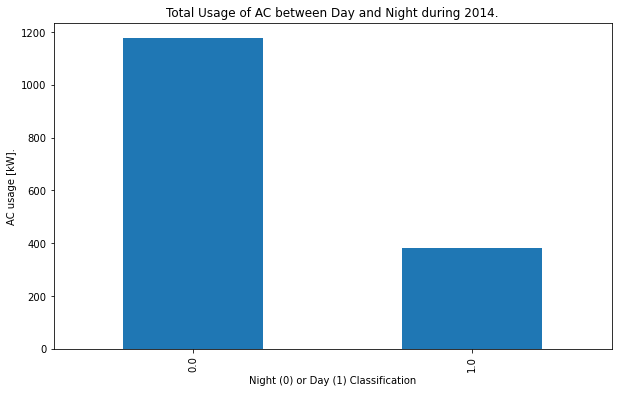

In [50]:
# Summing up the energy usage for the AC based on whether it is 0 (night) or 1 (day)

ac_usage_sum = ac_usage_df.groupby('day/night class')['AC [kW]'].sum()

# Displaying a bar plot of the AC usage between day and night.

fig, ax = plt.subplots(figsize=(10,6))
bar_plot_sum = ac_usage_sum.plot.bar(x='day/night class', y='AC [kW]', title='Total Usage of AC between Day and Night during 2014.', ax=ax)
bar_plot_sum.set_xlabel('Night (0) or Day (1) Classification')
bar_plot_sum.set_ylabel('AC usage [kW].')
plt.show()

# From this plotted bar graph, we can see that my initial thoughts/inference was incorrect.
# The AC usage is predominantly at night, as seen with classification 0 in the plot below.
# The total usage of the AC during the night is nearly 3 times the amount during the day.

In [51]:
# printing out the summed up energy usage of the ac
# As we can see, the total energy usage for the AC is primarily at night, with 1177 kW.
# However, for the total energy usage for the AC during the day is about 382 kW.
# The ratio of the total day AC usage to the total night AC usage is around 32.45%.
# This could possibly be related to the fact that people prefer to turn the AC at night
# to find comfort in sleeping with their blanket while AC is on. Also, maybe this is a 
# hose

ac_usage_sum

day/night class
0.0    1177.164342
1.0     382.094052
Name: AC [kW], dtype: float64

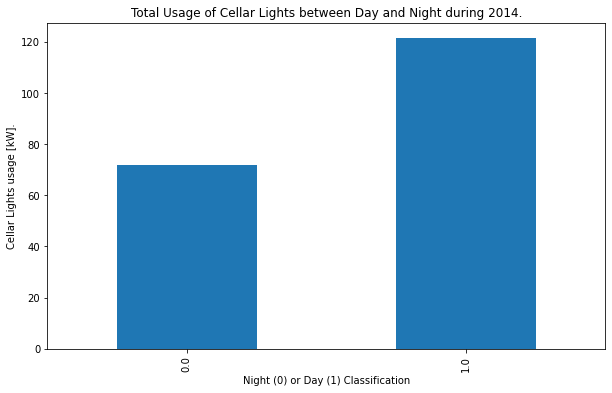

In [52]:
# Summing up the energy usage for the Cellar Lights based on whether it is 0 (night) or 1 (day)

c_lights_usage_sum = cellar_lights_df.groupby('day/night class')['Cellar Lights [kW]'].sum()

# Displaying a bar plot of the Cellar Lights usage between day and night.

fig, ax = plt.subplots(figsize=(10,6))
bar_plot_sum = c_lights_usage_sum.plot.bar(x='day/night class', y='Cellar Lights [kW]', title='Total Usage of Cellar Lights between Day and Night during 2014.', ax=ax)
bar_plot_sum.set_xlabel('Night (0) or Day (1) Classification')
bar_plot_sum.set_ylabel('Cellar Lights usage [kW].')
plt.show()

# From the bar plot below, we can see that the total energy usage of the 
# cellar lights is nearly 1:2 for the ratio between the night : day usage.
# This could most likely be explained by the fact that during the day, the
# residents of the household may be utilizing the cellar to access items 
# and would require the lights to see in the cellar. Most likely at night,
# there is less of a need to access the celler and using the cellar lights.

In [53]:
# Printing out the cellar lights usage summed up and printing out the numbers to visualize.

c_lights_usage_sum

# As we can see from the printed values, we can see that there is near 1:2 ratio
# between the night and day classification energy usages for the cellar lights.
# The actual ratio is around 59.5% between the night and day energy usage
# for the cellar lights.

day/night class
0.0     71.906120
1.0    121.436639
Name: Cellar Lights [kW], dtype: float64

In [54]:
# Getting two different dataframes that depict the AC usage during the day and one that depicts
# the AC usage during the night. 

ac_usage_day = ac_usage_df[ac_usage_df['day/night class'] == 1]
ac_usage_night = ac_usage_df[ac_usage_df['day/night class'] == 0]

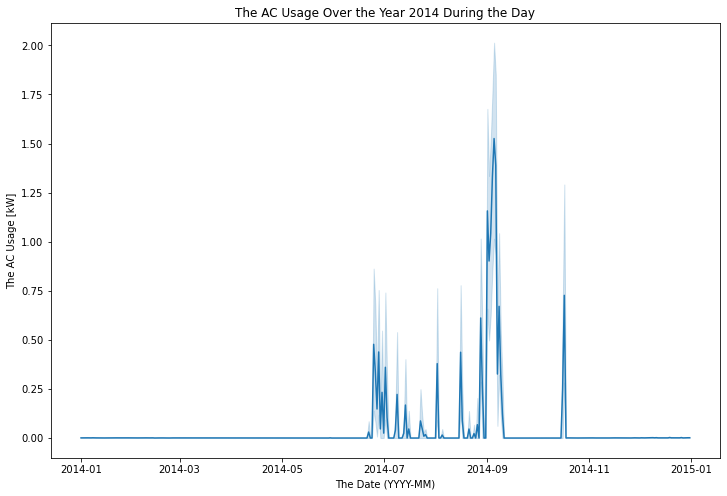

In [55]:
# Plotting the AC Usage over the year if it is during the day.
# As we can observe below, the concentration of the AC usage during the day
# is around the July mark to around mid September, with a spike during October.
# The reasoning behind this may be that summer starts a bit later for the house
# in this location in the world.

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ac_usage_day, x='date', y='AC [kW]', ax=ax)
ax.set_title('The AC Usage Over the Year 2014 During the Day')
ax.set_xlabel('The Date (YYYY-MM)')
ax.set_ylabel('The AC Usage [kW]')
plt.show()

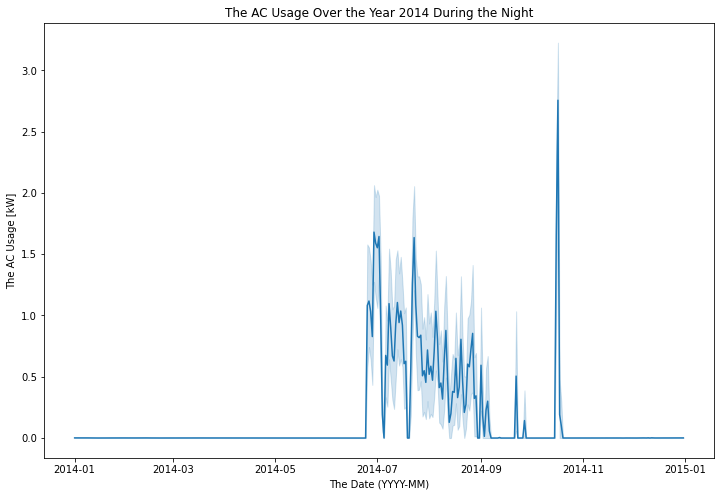

In [56]:
# Plotting the AC Usage over the year during the night, as we can see the usage correlates
# to the usage from the day time, but with a greater amount being used. This could possibly
# be explained by the fact that this location is set in a different continent or experiences
# a warmer night time. If this time is in respect to EST, then it could possibly be related
# to the country's weather and being hot or not.

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ac_usage_night, x='date', y='AC [kW]', ax=ax)
ax.set_title('The AC Usage Over the Year 2014 During the Night')
ax.set_xlabel('The Date (YYYY-MM)')
ax.set_ylabel('The AC Usage [kW]')
plt.show()

In [57]:
# Getting two dataframes, one representing the cellar lights usage during the day
# and one representing the cellar lights usage during the night. These will be used to plot
# to the user to see when during the year are these cellar lights being used.

c_lights_day = cellar_lights_df[cellar_lights_df['day/night class'] == 1]
c_lights_night = cellar_lights_df[cellar_lights_df['day/night class'] == 0]

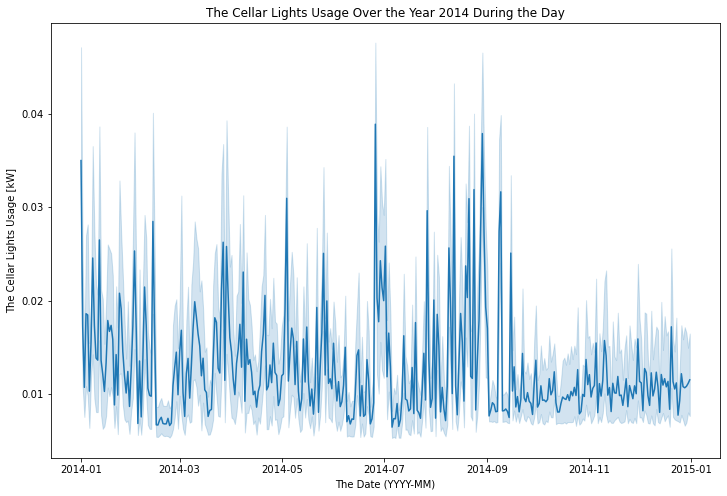

In [58]:
# As we can see from the plotted line plot below, the cellar lights are used throughout
# the year of 2014 and during the day, we get a good amount of usage. This could be explained
# since cellar lights would be used more often than the AC, which would typically be used
# during the warm weather days.

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=c_lights_day, x='date', y='Cellar Lights [kW]', ax=ax)
ax.set_title('The Cellar Lights Usage Over the Year 2014 During the Day')
ax.set_xlabel('The Date (YYYY-MM)')
ax.set_ylabel('The Cellar Lights Usage [kW]')
plt.show()

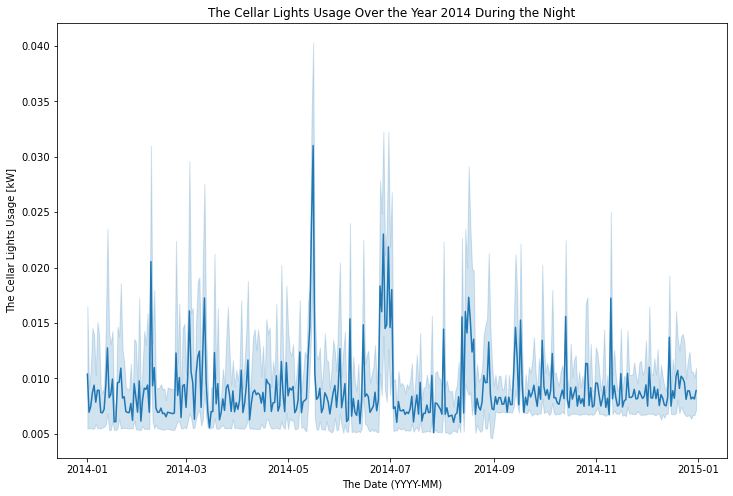

In [59]:
# here is the plot for the cellar lights usage over the year during the night and we 
# see that the lights are used fairly enough. The usage seems to be less than the day usage
# but that could be explained by the fact that people sleep during the night.

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=c_lights_night, x='date', y='Cellar Lights [kW]', ax=ax)
ax.set_title('The Cellar Lights Usage Over the Year 2014 During the Night')
ax.set_xlabel('The Date (YYYY-MM)')
ax.set_ylabel('The Cellar Lights Usage [kW]')
plt.show()